テキストデータの分析
=================
```{epigraph}
Words are loaded pistols

-- Jean-Paul Sartre
```
文字の発明により、人類は知識や経験を記録できるようになりました。
その結果、時間と空間を超えた情報の伝達が可能になったのです。

人類が文字を使用し始めたのは約5000年前のメソポタミアで、
最初の文字体系である楔形文字が発明されました。
この時期のテキスト量は非常に限られており、主に商業や宗教的な記録に使用されていました。

15世紀の印刷技術の発明により、書籍の生産が飛躍的に増加しました。
この時期、特に宗教書や学術書が多く出版され、テキスト量は急増しました。

19世紀から20世紀にかけて、新聞や雑誌の普及により、一般市民がアクセスできるテキスト量が大幅に増加しました。
また、教育の普及もテキストの消費を促進しました。

21世紀に入ると、インターネットの普及に伴い、テキスト量は爆発的に増加しました。
ブログ、SNS、電子書籍など、多様な形式での情報発信が行われ、1日に受け取る情報量は平安時代の一生分に相当すると言われています。

デジタル技術の発達により、誰もが簡単に文字情報を

- 作成
- 保存
- 共有
- コピー

できるようになりました。

毎日、膨大な量の新しいテキストデータが生み出され、インターネット上に蓄積され続けています。

この状況では、「この膨大なテキストデータから、どうやって価値ある情報を見つけ出すか？」が重要になります。
つまり、**テキストデータの分析**が必要になります。

## 形態素解析

形態素解析とは、文章を意味を持つ最小単位（形態素）に分割し、それぞれに品詞などの情報を付与する処理です。
日本語は英語などと異なり単語間にスペースが存在しないため、テキスト処理において形態素解析が特に重要な役割を果たします。

この過程で生成される個々の言語単位を「トークン」と呼びます。
トークンとは、テキストを処理する際の基本的な単位であり、単語や記号、句読点などがトークンとして扱われます。
形態素解析では、文章をこれらのトークンに分割した上で、各トークンの品詞や活用形などの文法情報を特定します。

日本語の主な形態素解析ツールは以下の通りです。

1. MeCab
   - 高速で精度が高い
   - オープンソース
   - 多くのプロジェクトで採用

2. Janome
   - Pythonネイティブ
   - インストールが容易
   - 純粋なPythonで実装

3. Sudachi
   - 最新の解析モデル
   - 複数の分割粒度に対応
   - 辞書の更新が活発

ここでは、Sudachiを使って単語を分割してみましょう。

In [1]:
import sudachipy
from sudachipy import tokenizer
from sudachipy import dictionary

tokenizer_obj = dictionary.Dictionary().create()
mode = tokenizer.Tokenizer.SplitMode.C

# サンプルテキスト
text = "私は計算機室でプログラミングをしています。"

# 形態素解析の実行
tokens = tokenizer_obj.tokenize(text, mode)
for token in tokens:
    print(token.surface(), token.part_of_speech())

私 ('代名詞', '*', '*', '*', '*', '*')
は ('助詞', '係助詞', '*', '*', '*', '*')
計算機 ('名詞', '普通名詞', '一般', '*', '*', '*')
室 ('接尾辞', '名詞的', '一般', '*', '*', '*')
で ('助詞', '格助詞', '*', '*', '*', '*')
プログラミング ('名詞', '普通名詞', 'サ変可能', '*', '*', '*')
を ('助詞', '格助詞', '*', '*', '*', '*')
し ('動詞', '非自立可能', '*', '*', 'サ行変格', '連用形-一般')
て ('助詞', '接続助詞', '*', '*', '*', '*')
い ('動詞', '非自立可能', '*', '*', '上一段-ア行', '連用形-一般')
ます ('助動詞', '*', '*', '*', '助動詞-マス', '終止形-一般')
。 ('補助記号', '句点', '*', '*', '*', '*')


5行目では、Sudachiの辞書を読み込んで、単語を分割するためのツールを準備しています。
6行目は単語の分割モードを設定しています。モードCは「最も長い単位」で文章を区切るモードです。例えば「東京都庁」などをひとつの単語として扱います。
12行目で実際に文章を単語に分割し、その結果を`tokens`という変数に保存しています。

このプログラムを実行すると文章がトークンに分割され、それぞれの品詞情報（名詞、助詞など）が表示されます。

## テキストの正規化

なぜテキスト正規化が必要なのでしょうか。
例えば「東京」と「とうきょう」は同じ意味ですが、コンピュータにとっては全く別の文字列です。
または「Python」と「python」は最初の文字が大文字か小文字の違いだけですが、
大文字の方はプログラミング言語としての名称で、小文字の方はコマンドとして使う時の名称になります。
他にも正規化には全角と半角の違い、異なる表記のゆらぎを統一するなどがあります。

テキストの正規化は、データの品質を向上させ、分析の精度を上げるために重要な前処理です。

Sudachiを使って簡単な正規化を行ってみます。

In [2]:
import sudachipy
from sudachipy import tokenizer, dictionary

tokenizer_obj = dictionary.Dictionary().create()
mode = tokenizer.Tokenizer.SplitMode.C

text = "２０２５年7月に私はＰｙｔｈｏｎでProgramを書いていた。"

orig_text = ""
normalized_text = ""
    
for token in tokenizer_obj.tokenize(text, mode):
  #簡単な正規化
  normalized_text += token.normalized_form() + "/"
  orig_text += token.surface() + "/"
    
print(orig_text)
print(normalized_text)

２０２５/年/7/月/に/私/は/Ｐｙｔｈｏｎ/で/Program/を/書い/て/い/た/。/
2025/年/7/月/に/私/は/python/で/プログラム/を/書く/て/居る/た/。/


全角を半角にするなどの正規化が確認できます。

## ストップワードの除去

「は」「が」「の」「を」などの助詞や「です」「ます」などの助動詞は分析にあまり重要でないと気づいたと思います。
これらの語は、**ストップワード**と呼ばれ、高頻度で出現するものの、文書の内容や特徴を捉える上ではあまり意味を持ちません。

ストップワードを除去すると、
- 分析の効率化（処理するデータ量の削減）
- ノイズの低減（本質的な内容に集中できる）
- より意味のある単語の重要度を上げる
という効果が得られます。

分析に不要な一般的な語（助詞、助動詞など）を除去します。

In [3]:
import sudachipy
from sudachipy import tokenizer, dictionary

stop_words = ['や', 'れ', 'は', 'な', 'から', 'て', 'この', 'ため', 'の', 'か', 'を', 'など', 'よう', 'あれ', 'である', 'に', 'もの', 'こと', 'で', 'です', 'その', 'さ', 'た', 'あの', 'と', 'し', 'ある', 'いる', 'へ', 'が', 'ます', 'まで', 'それ', 'これ', 'える']

tokenizer_obj = dictionary.Dictionary().create()
mode = tokenizer.Tokenizer.SplitMode.C

text = "夏の草が生い茂る場所は、かつて兵士たちが夢を抱いて戦った跡地である。"

words = []

for token in tokenizer_obj.tokenize(text, mode):
  surface = token.surface()
  pos = token.part_of_speech()[0]

  if surface not in stop_words:
    if pos in ['名詞', '動詞', '形容詞']:
      words.append(token.normalized_form())
    
print(words)

['夏', '草', '生い茂る', '場所', '兵士', '夢', '抱く', '戦う', '跡地']


## Word2Vec

文字はコンピュータ内部では数値として表現されています。
例えば、アルファベットの`A`は65という数値で表現されています。

In [4]:
print(ord('A'))

65


しかし単語（ワード）は数値として表現されていません。
単語は単なる文字列として扱われており、そのままでは単語同士の意味的な近さや関係性を計算できません。

Word2Vecは単語を数値ベクトルとして表現（ベクトル化）する手法です。
ベクトル化の便利なところは様々な演算が可能になり、単語の意味的な関係性を数学的に扱えることです。
例えば、有名な例だと「King - Man + Woman = Queen」というような計算ができます。

実際に確認してみましょう。

In [5]:
import gensim.downloader as api
import numpy as np
from contextlib import redirect_stdout, redirect_stderr
import io

# 初回はモデルのダウンロードされちゃうので、それを表示しないように
with redirect_stdout(io.StringIO()), redirect_stderr(io.StringIO()):
    model = api.load('glove-wiki-gigaword-50')

# 単語ベクトルを取得
king_vec = model['king']
man_vec = model['man']
woman_vec = model['woman']

# King - Man + Woman の計算
result_vec = king_vec - man_vec + woman_vec

# 結果ベクトルに最も近い単語を取得
result = model.most_similar([result_vec], topn=5)

print("King - Man + Woman の類似単語:")
for word, similarity in result:
    print(f"{word}: {similarity:.4f}")

King - Man + Woman の類似単語:
king: 0.8860
queen: 0.8610
daughter: 0.7685
prince: 0.7641
throne: 0.7635


word2vecを使って、他の単語の近さなどを確認してみましょう。

Word2Vecは**分布仮説**に基づいています。
分布仮説とは「似た文脈で使われる単語は、似た意味を持つ」という言語学の考え方です。
例えば、「私はコーヒーを飲む」と「私は紅茶を飲む」という文では、「コーヒー」と「紅茶」は同じような文脈で使われているため、
これらは意味的に関連していると考えられます。

Word2Vecには主に2つの学習アルゴリズムがあります。

- CBOW (Continuous Bag of Words): 周囲の単語から中心単語を予測します
  - 例：「私は（？）を飲む」という文で、（？）に入る単語を予測
  - 複数の入力から1つの出力を予測するため、一般的に学習が速い
  - 頻出単語の表現に強い
- Skip-gram: 中心単語から周囲の単語を予測します
  - 例：「コーヒー」という単語から「私」「は」「を」「飲む」などの周辺単語を予測
  - 1つの入力から複数の出力を予測するため、計算コストは高いが低頻度語の表現に強く、より精度の高い結果が得られることが多い

学習の結果、意味的・文法的に類似した単語は、ベクトル空間上で近い位置に配置されます。

## WordCloud

WordCloud（ワードクラウド）とは、文書内の単語の出現頻度を視覚的に表現するための手法です。
頻出単語ほど大きなフォントで表示されるため、文章の中でどのような単語が重要かを一目で把握できます。

Webサイトから情報を取得し、そこに含まれる名詞をWordCloudで可視化してみましょう。

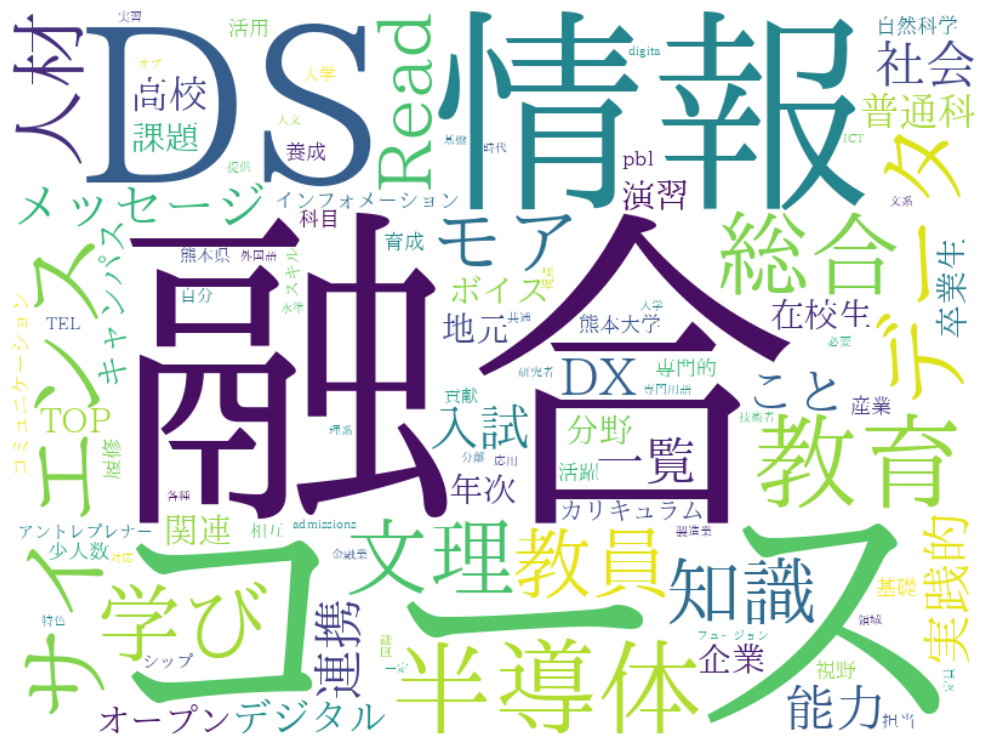

In [6]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sudachipy import tokenizer, dictionary

from wordcloud import WordCloud
from collections import Counter
import re
from bs4 import BeautifulSoup
import requests

url = "https://www.soi.kumamoto-u.ac.jp/"
response = requests.get(url)
response.encoding = response.apparent_encoding

soup = BeautifulSoup(response.text, features="html.parser")

text = soup.get_text()

# Sudachiの設定
tokenizer_obj = dictionary.Dictionary().create()
mode = tokenizer.Tokenizer.SplitMode.C

# 単語の抽出
words = []
for line in text.split('\n'):
    tokens = tokenizer_obj.tokenize(line, mode)
    for token in tokens:
        # 名詞のみを抽出
        pos = token.part_of_speech()[0]
        if pos in ["名詞"]:
            word = token.normalized_form()
            # 1文字の単語、数字のみの単語を除外
            if len(word) > 1 and not re.match(r'^[0-9]+$', word):
                words.append(word)

# 出現頻度の集計
word_count = Counter(words)

# システムにインストールされている日本語フォントを自動検出
fonts = [f.name for f in fm.fontManager.ttflist if 'Gothic' in f.name or 'Mincho' in f.name or '明朝' in f.name or 'ゴシック' in f.name]
font_path = fm.findfont(fonts[0] if fonts else 'DejaVu Sans')

wordcloud = WordCloud(
    background_color='white',
    font_path=font_path,
    width=800,
    height=600,
    max_words=100,
    colormap='viridis'
)
wordcloud.generate_from_frequencies(word_count)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

プログラムの説明をします。
5-9行目は
ウェブサイトからテキストを取得し、単語を抽出して、その出現頻度を視覚的に表示するという一連の処理を行うために必要なライブラリを読み込んでいます。

- wordcloud
  - テキスト中の単語の頻度に基づいて、よく出てくる単語を大きく表示する「WordCloud」を作ります。
- collections
  - Pythonの標準ライブラリで、データを保存・管理できる機能を提供します。ここでは「Counter」という機能を使って、各単語が何回出現したかを簡単に数えられます。
- re
  - 正規表現（regular expression）を扱うためのライブラリです。テキストの中から特定のパターン（例：数字だけの単語）を見つけたり、置き換えたりする処理で使います。
- bs4 (Beautiful Soup)
  - HTMLやXMLを解析するためのライブラリです。ウェブページから必要な情報を取り出す際に便利です。
- requests
  - インターネット上のウェブページを取得するためのライブラリです。ブラウザでURLを開くのと同じように、プログラムからウェブサイトにアクセスできます。

11行目で情報を取得するURLを決めています。
プログラムを短時間に繰り返し実行すると、相手のサーバーに過剰な負荷をかけてしまう可能性があります。
これはサーバーへの「DoS攻撃」（サービス妨害攻撃）とみなされることもあるため、実行頻度には十分注意しましょう。特に学習やテスト目的であれば、数回の実行にとどめるか、自分のローカル環境に保存したデータを使用するようにするとよいでしょう。

12行目で設定したURLからデータを取得しています。このままだとデータのtext部はHTMLです。
そのため、15行目で文章部分だけを取得するために`BeautifulSoup`を使います。

20-34行目で、文章からWordCloudで表示するための単語を抽出しています。
wordsというリストには、文字で使用された単語が入っています。

単語のリストだけだと、どの単語が何回使われたかわかりません。
そこで37行目で`Counter`を使って使用頻度を計算し、`word_count`という変数で指すようにします。

43-50行目でWordCloudの設定をしています。
色や表示する文字などです。

51行目で`word_count`から実際のWordCloudを作っています。